# Prediction using Supervised Machine Learning.

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Read the given CSV file, and view some sample records
data = pd.read_csv("student_scores.csv")
print()
print("Data Loaded Successfully.......................!!!!!!!!!!!!!!!!!!!")

data.head(10)


Data Loaded Successfully.......................!!!!!!!!!!!!!!!!!!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Shape of our dataset
data.shape

(25, 2)

In [5]:
# Info our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Describe our dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


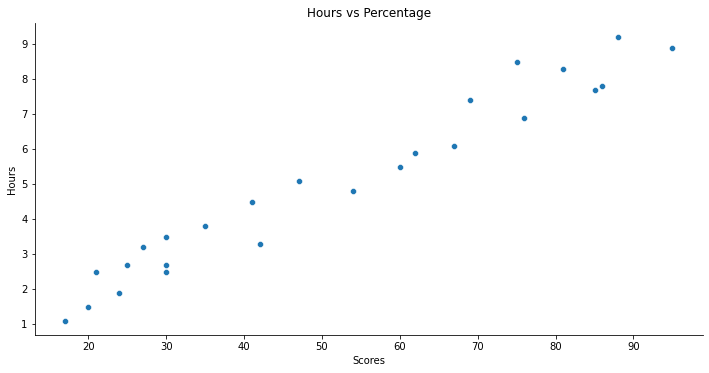

In [7]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['Scores'], 
             y_vars='Hours', size=5, aspect=2, kind='scatter')
plt.title('Hours vs Percentage')
plt.show()

From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.

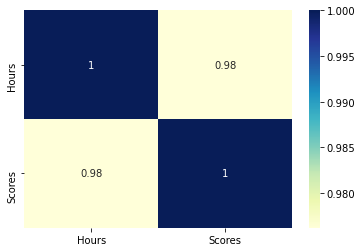

In [8]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Preparing the data

In [9]:
# Creating X and y. divide the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [10]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2, random_state = 100)

In [11]:
# Take a look at the train dataset
X_train
Y_train

array([69, 76, 54, 88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95,
       60, 75, 81], dtype=int64)

# Training the Model

In [12]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression(normalize = True)  
lr.fit(X_train, Y_train) 

print("Training complete................!!!")

Training complete................!!!


In [13]:
# Intercept value
print("Intercept :",lr.intercept_)

# Slope value
print('Slope :',lr.coef_)

Intercept : 1.989423110974684
Slope : [9.83544438]


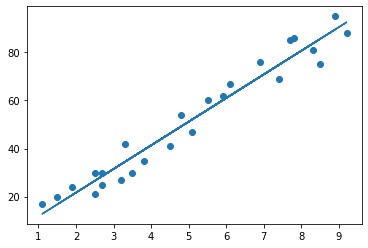

In [14]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [15]:
predictions = lr.predict(X_test)

In [16]:
lr.score(X_test, Y_test)

0.9050356232459791

In [17]:
print(X_test) # Testing data - In Hours
Y_pred = lr.predict(X_test) # Predicting the scores

[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


In [19]:
# You can also test with your own data
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = np.array(9.25).reshape(1, 1)
p = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(p[0]))

No of Hours = [[9.25]]
Predicted Score = 92.96728365185982


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.140342096254413


In [21]:
from sklearn.metrics import r2_score
# Making Predictions of y_value
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Comparing the r2 value of both train and test data
print("R2 Value of Train Data set: ",r2_score(Y_train,y_train_pred))
print("R2 Value of Test Data set: ",r2_score(Y_test,y_test_pred))

R2 Value of Train Data set:  0.9519568836485192
R2 Value of Test Data set:  0.9050356232459791


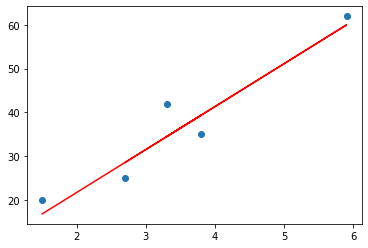

In [22]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, 'r')
plt.show()

# Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.